You are given two integers m and n. Consider an m x n grid where each cell is initially white. You can paint each cell red, green, or blue. All cells must be painted.

Return the number of ways to color the grid with no two adjacent cells having the same color. Since the answer can be very large, return it modulo 109 + 7.

 

Example 1:

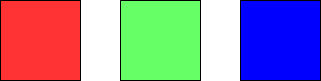

Input: m = 1, n = 1
Output: 3
Explanation: The three possible colorings are shown in the image above.

Example 2:

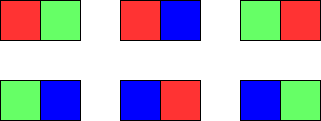

Input: m = 1, n = 2
Output: 6
Explanation: The six possible colorings are shown in the image above.

Example 3:

Input: m = 5, n = 5
Output: 580986

 

Constraints:

    1 <= m <= 5
    1 <= n <= 1000



In [ ]:
class Solution:
    def colorTheGrid(self, m: int, n: int) -> int:
        mod = 10**9 + 7
        # Hash mapping stores all valid coloration schemes for a single row that meet the requirements
        # The key represents mask, and the value represents the ternary string of mask (stored as a list)
        valid = dict()

        # Enumerate masks that meet the requirements within the range [0, 3^m)
        for mask in range(3**m):
            color = list()
            mm = mask
            for i in range(m):
                color.append(mm % 3)
                mm //= 3
            if any(color[i] == color[i + 1] for i in range(m - 1)):
                continue
            valid[mask] = color

        # Preprocess all (mask1, mask2) binary tuples, satisfying mask1 and mask2 When adjacent rows, the colors of the two cells in the same column are different
        adjacent = defaultdict(list)
        for mask1, color1 in valid.items():
            for mask2, color2 in valid.items():
                if not any(x == y for x, y in zip(color1, color2)):
                    adjacent[mask1].append(mask2)

        f = [int(mask in valid) for mask in range(3**m)]
        for i in range(1, n):
            g = [0] * (3**m)
            for mask2 in valid.keys():
                for mask1 in adjacent[mask2]:
                    g[mask2] += f[mask1]
                    if g[mask2] >= mod:
                        g[mask2] -= mod
            f = g

        return sum(f) % mod